In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
class graph:
    def __init__(self, p):
        self.p = p
        
        
    def A(self, dist = 0):
        if random.random() < self.p:
            return self.B(dist+1)
        else:
            return self.C(dist+1)

        
    def B(self, dist):
        return dist
    
    
    def C(self, dist):
        if random.random() < self.p:
            return self.B(dist+1)
        else:
            return self.A(dist+1)
        
        
    def step(self):
        return self.A(0)
    
    def calculate_mean(self, size = 100000):
        return np.array([model.step() for i in range(size)]).mean()

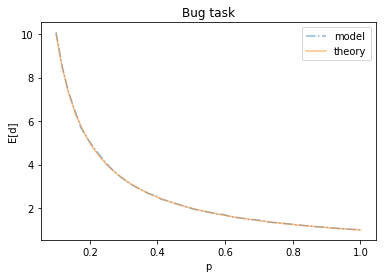

In [9]:
E_lst, p_lst = [],[]
for p in np.linspace(0.1,1 , 50):
    model = graph(p)
    E_lst.append(model.calculate_mean(size = 10000))
    p_lst.append(p)
    
def f_theory(x):
    return 1/x#(x+(1-x)*2*x+(1-x)**2*2)/(1-(1-x)**2)

plt.title('Bug task')
plt.plot(p_lst, E_lst, '-.',  label = 'model', alpha = 0.5)
plt.plot(p_lst, list(map(f_theory, p_lst)), label = 'theory', alpha = 0.5)
plt.legend()
plt.xlabel('p')
plt.ylabel('E[d]')
plt.show()